<a href="https://colab.research.google.com/github/gjduart/Machine-Learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Gabriel Jonas da Silva Duarte
Relatório Exercicio 5 - MLP


<h3>Primeira Questão<h3>

Realizando download do dataset da primeira questão

In [1]:
!wget --no-check-certificate \
    "https://www.dropbox.com/s/s2cyx82uxsv03rq/dados-ex5.txt?dl=0" \
    -O "/tmp/dados-ex5.txt"



--2020-10-29 18:29:17--  https://www.dropbox.com/s/s2cyx82uxsv03rq/dados-ex5.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s2cyx82uxsv03rq/dados-ex5.txt [following]
--2020-10-29 18:29:17--  https://www.dropbox.com/s/raw/s2cyx82uxsv03rq/dados-ex5.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f62ebd12a7b65e277fcd07ac2.dl.dropboxusercontent.com/cd/0/inline/BCNk1ToC9TsIAkMopl9MSRWAQ8DGggTsV41X0VL6KERHJD3a7LQYRm8GJ9_F6fEcb8DT3zxqLtwleXNXxXmS8ApIYY0JqTIjSckGpiVzL2-li3Z4X3p002dA65tZORp8KS0/file# [following]
--2020-10-29 18:29:17--  https://uc4f62ebd12a7b65e277fcd07ac2.dl.dropboxusercontent.com/cd/0/inline/BCNk1ToC9TsIAkMopl9MSRWAQ8DGggTsV41X0VL6KERHJD3a7LQYRm8GJ9_F6fEcb8DT3zxqLtwleXNXxXmS8ApIYY0JqTIjSckGpiVzL2

Importando as bibliotecas

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from torch.nn import functional as F



Definindo nosso modelo, iremos aplicar uma transformção linear aos dados de entrada: $Y = xA^T + b$

In [3]:

class FeedForward(nn.Module):


    def __init__(self,input_dim, hidden_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out




Relizaremos o split dos dados para podermos prosseguir para o treino, validação e teste.

In [4]:
from sklearn.model_selection import train_test_split
dset_1questao = np.genfromtxt('/tmp/dados-ex5.txt',delimiter=',') #Importa os dados
dset_1questao = torch.from_numpy(dset_1questao)
dset_1questao.shape

x = dset_1questao[:,:-1]
y = dset_1questao[:,-1]

x = torch.FloatTensor(x.float())
y = torch.FloatTensor(y.float())



print(f'Shape_X:{x.shape}, Shape_Y:{y.shape}')
#Realiza a separação dos dados
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=100)


input = 2

output = 10
hidden = 100

model = FeedForward(input, hidden,output) #define o nosso modelo


Shape_X:torch.Size([900, 2]), Shape_Y:torch.Size([900])


In [5]:
batch_size = 64 #Quantas amostras eu quero pra aproximar o gradiente


train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
test_ds = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(Y_test))

trainset = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test_ds, batch_size=360, shuffle=True)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


Há de definir a taxa de aprendizagem, função custo (Cross Entropy Loss) e o otimizador(Gradiente Descendente Estocastico)

In [6]:
loss_func = nn.CrossEntropyLoss() 
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


Definindo 2 listas vazias para armazenar os pontos para plot.

In [7]:
train_losses, test_losses = [], []
Y_test.shape


torch.Size([360])

A loss total se inicia com o 0, e ao longo de 100 épocas iremos treinar nosso modelo, para cada dado no dataset, iremos aplicar o nosso modelo a esse dado X. Apos o treino será realizada as predições, o gradiente não é computado. Calcularemos a acuracia e a validação para antes e após a predição.

In [8]:
total_loss = 0
for epoch in range(100): 
    model.train()
    total_loss = 0
    for data in trainset:  
        X, y = data  

        y = y.type(torch.LongTensor)
        
        optimizer.zero_grad()  #Zera o Otimizador
        output = model(X)      #Aplica o modelo ao X
        loss = loss_func(output, y)  #Calcula a Loss
        loss.backward()  
        optimizer.step()  
        total_loss += loss.data  #Soma as Loss
    print(total_loss)
    if epoch % 1 == 0: #verifica cada epoca
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testset:
                
                X, labels = data
                
                outputs = model(X)
        

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)


                test_loss += (predicted !=labels).sum()
                correct += (predicted == labels).sum()
            accuracy = 100.0 * correct / total
            train_losses.append(total_loss.item()/len(trainset))
            test_losses.append(test_loss.item()/len(testset))

            
            print(f'Epoca:{epoch}, Loss: {total_loss.item():.3f},Acuracia:{accuracy.item():.3f}')


tensor(21.6599)
Epoca:0, Loss: 21.660,Acuracia:26.111
tensor(16.2291)
Epoca:1, Loss: 16.229,Acuracia:76.667
tensor(12.4202)
Epoca:2, Loss: 12.420,Acuracia:79.167
tensor(9.9155)
Epoca:3, Loss: 9.915,Acuracia:80.278
tensor(8.2583)
Epoca:4, Loss: 8.258,Acuracia:80.556
tensor(7.1880)
Epoca:5, Loss: 7.188,Acuracia:81.111
tensor(6.4647)
Epoca:6, Loss: 6.465,Acuracia:81.944
tensor(5.9101)
Epoca:7, Loss: 5.910,Acuracia:83.056
tensor(5.4899)
Epoca:8, Loss: 5.490,Acuracia:83.056
tensor(5.1639)
Epoca:9, Loss: 5.164,Acuracia:83.333
tensor(4.8843)
Epoca:10, Loss: 4.884,Acuracia:83.889
tensor(4.7841)
Epoca:11, Loss: 4.784,Acuracia:84.444
tensor(4.5957)
Epoca:12, Loss: 4.596,Acuracia:84.722
tensor(4.3835)
Epoca:13, Loss: 4.384,Acuracia:84.722
tensor(4.2736)
Epoca:14, Loss: 4.274,Acuracia:84.722
tensor(4.2471)
Epoca:15, Loss: 4.247,Acuracia:84.722
tensor(4.1295)
Epoca:16, Loss: 4.129,Acuracia:84.722
tensor(3.9618)
Epoca:17, Loss: 3.962,Acuracia:85.000
tensor(3.9311)
Epoca:18, Loss: 3.931,Acuracia:85.2

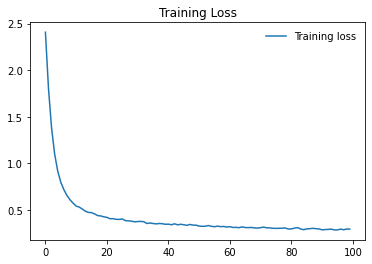

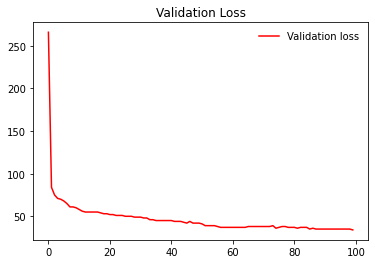

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.title('Training Loss')
plt.legend(frameon=False)
plt.show()

plt.plot(test_losses, label='Validation loss', color = 'r')
plt.title('Validation Loss')
plt.legend(frameon=False)
plt.show()

<h3>Segunda questao</h3>

O dataset escolhido foi o FashionMnist, 60 Mil amostras para treino e 10 mil para teste, composto por imagens 28x28 em grayscale. Usado para benchmarks, possui 10 classes e o seu objetivo principal é para indentificação de roupas.

Importando o dataset

In [10]:
train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
batch_size = 64 #Quantas amostras eu quero pra aproximar o gradiente

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [12]:
input_dim = 28*28
output_dim = 10
hidden_dim = 100

model = FeedForward(input_dim, hidden_dim, output_dim)


loss_func = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
losses = []

In [13]:
for epoch in range(50):
    model.train()
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1,28*28)
        labels = labels
        
        #Limpando o gradiente 
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = loss_func(outputs, labels)
        
        loss.backward()
        total_loss += loss
        optimizer.step()
        
    if epoch % 1 == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                
                images = images.view(-1, 28*28)
                
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            accuracy = 100.0 * correct / total
            losses.append(total_loss.item())
            print(f'Epoca:{epoch}, Loss: {total_loss.item():.3f},Acuracia:{accuracy.item():.3f}')



Epoca:0, Loss: 1096.598,Acuracia:74.040
Epoca:1, Loss: 632.876,Acuracia:80.053
Epoca:2, Loss: 542.162,Acuracia:81.323
Epoca:3, Loss: 497.449,Acuracia:82.740
Epoca:4, Loss: 470.212,Acuracia:83.388
Epoca:5, Loss: 452.667,Acuracia:83.733
Epoca:6, Loss: 439.088,Acuracia:84.248
Epoca:7, Loss: 428.206,Acuracia:84.210
Epoca:8, Loss: 418.896,Acuracia:84.602
Epoca:9, Loss: 411.651,Acuracia:85.155
Epoca:10, Loss: 404.881,Acuracia:85.250
Epoca:11, Loss: 398.838,Acuracia:85.398
Epoca:12, Loss: 392.946,Acuracia:85.500
Epoca:13, Loss: 388.052,Acuracia:85.722
Epoca:14, Loss: 382.722,Acuracia:86.050
Epoca:15, Loss: 378.411,Acuracia:86.138
Epoca:16, Loss: 374.533,Acuracia:86.273
Epoca:17, Loss: 370.001,Acuracia:86.607
Epoca:18, Loss: 367.091,Acuracia:86.015
Epoca:19, Loss: 363.299,Acuracia:86.703
Epoca:20, Loss: 360.094,Acuracia:86.982
Epoca:21, Loss: 355.657,Acuracia:86.888
Epoca:22, Loss: 352.805,Acuracia:87.210
Epoca:23, Loss: 350.134,Acuracia:87.012
Epoca:24, Loss: 347.034,Acuracia:86.985
Epoca:2

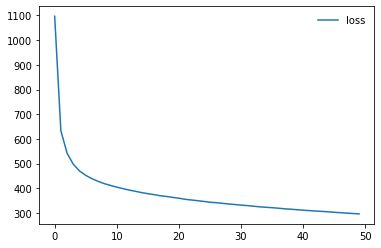

In [14]:
plt.plot(losses, label='loss')
plt.legend(frameon=False)
plt.show()

Comparar com KNN

In [15]:
class KNN():
    def __init__(self, K, train_data, train_targets):
        super(KNN, self).__init__()
        self.data = train_data
        self.K = K
        self.targets = train_targets

    def predict(self, x):
        dists = torch.cdist(x, self.data) # computa distancia  ponto a ponto
        index = dists.argsort()[:, :self.K] 
        knns = self.targets[index]  # seleciona os rotulos dos vizinhos
        return knns.mode(dim=1).values  # retorna os valores da moda nos K vizinhos

In [16]:
n_training_samples = 30000
train_data = train_dataset.data[:n_training_samples].view(n_training_samples, -1)
train_targets = train_dataset.targets[:n_training_samples].view(n_training_samples, -1)

test_data = test_dataset.data[:1500].view(1500, -1)
test_targets = test_dataset.targets[:1500].view(1500, -1)

# transformando os valores de pixel (int) para double 
train_data = train_data.float()
test_data = test_data.float()

model = KNN(5, train_data, train_targets)

In [17]:
predictions = model.predict(test_data)
acuracia = torch.mean((predictions-test_targets == 0).float())
print(f'Acuracia : {acuracia*100:.3f}%')

Acuracia : 83.067%


Assim podemos concluir que o MLP obteve um desempenho bem melhor do que outros algoritmos como o KNN